In [1]:
# This memo visualizes the distribution of urban and rural populations
# This is for Tokyo metro area

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df_tokyo = pd.read_csv('../../Data/Downloaded_Old/urban_rural_pop_tokyo.csv', index_col = ['year_jpn', 'year_wst'] )

In [4]:
df_tot = pd.read_csv('../../Data/Downloaded_Old/urban_rural_pop_total.csv')

In [5]:
df_kanagawa = pd.read_csv('../../Data/Downloaded_Old/urban_rural_pop_kanagawa.csv', index_col = ['year_jpn', 'year_wst'])
df_saitama = pd.read_csv('../../Data/Downloaded_Old/urban_rural_pop_saitama.csv',index_col = ['year_jpn', 'year_wst'] )
df_chiba = pd.read_csv('../../Data/Downloaded_Old/urban_rural_pop_chiba.csv',index_col = ['year_jpn', 'year_wst'] )

In [6]:
df = df_tokyo + df_kanagawa + df_saitama + df_chiba

In [7]:
df = df.reset_index()

In [8]:
df['urban_share'] = df['pop_urban'] / df['pop_tot']

In [9]:
df['rural_share'] = df['pop_rural'] / df['pop_tot']

In [10]:
# Convert units to 1 million people
cnvt_to_mil = 1e6

In [11]:
df['pop_tot_mil'] = df['pop_tot'] / cnvt_to_mil
df['pop_urban_mil'] = df['pop_urban'] /cnvt_to_mil
df['pop_rural_mil'] = df['pop_rural'] /cnvt_to_mil

In [12]:
df_tot['pop_tot_mil'] = df_tot['pop_tot'] / cnvt_to_mil
df_tot['pop_urban_mil'] = df_tot['pop_urban'] /cnvt_to_mil
df_tot['pop_rural_mil'] = df_tot['pop_rural'] /cnvt_to_mil

In [13]:
cnvt_to_mil

1000000.0

In [14]:
df

,year_jpn,year_wst,pop_tot,pop_urban,pop_rural,area,pop_density,pop_urban_dense,area_urban_dense,pop_rural_dense,area_rural_dense,urban_share,rural_share,pop_tot_mil,pop_urban_mil,pop_rural_mil
0,明治31年,1898.0,5479741,1633883,3845858,............,............,0,0.0,0,0.0,0.298168,0.701832,5.479741,1.633883,3.845858
1,36,1903.0,6140937,2144690,3996247,............,............,0,0.0,0,0.0,0.349245,0.650755,6.140937,2.144690,3.996247
2,41,1908.0,6874447,2651346,4223101,............,............,0,0.0,0,0.0,0.385681,0.614319,6.874447,2.651346,4.223101
3,大正 2年,1913.0,7118880,2533173,4585707,............,............,0,0.0,0,0.0,0.355839,0.644161,7.118880,2.533173,4.585707
4,7,1918.0,7829819,2926268,4903551,............,............,0,0.0,0,0.0,0.373734,0.626266,7.829819,2.926268,4.903551
5,9,1920.0,7678506,2724973,4953533,2142.42351.633803.545078.81,1727563347263,0,0.0,0,0.0,0.354883,0.645117,7.678506,2.724973,4.953533
6,14,1925.0,8695654,2671439,6024215,2142.42351.633803.545078.81,2094602367276,0,0.0,0,0.0,0.307215,0.692785,8.695654,2.671439,6.024215
7,昭和 5年,1930.0,9957577,3041052,6916525,2144.792353.483801.445078.81,2522688384289,0,0.0,0,0.0,0.305401,0.694599,9.957577,3.041052,6.916525
8,10,1935.0,11285172,7338812,3946360,2144.82352.813802.685062.09,2970782402305,0,0.0,0,0.0,0.650306,0.349694,11.285172,7.338812,3.946360
9,15,1940.0,12740409,8948799,3791610,2144.82352.813802.685062.09,3429930423314,0,0.0,0,0.0,0.702395,0.297605,12.740409,8.948799,3.791610


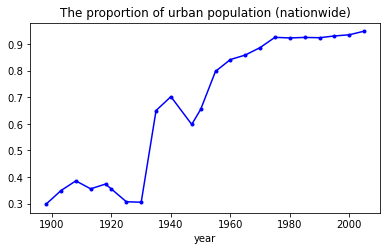

In [15]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df.plot(x = 'year_wst', y = 'urban_share', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('The proportion of urban population (nationwide)')
plt.savefig('../../Notes/Facts/urban_share_tokyo.pgf')
plt.show()

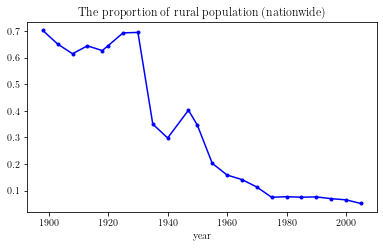

In [16]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df.plot(x = 'year_wst', y = 'rural_share', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('The proportion of rural population (nationwide)')
plt.savefig('../../Notes/Facts/rural_share_tokyo.pgf')
plt.show()

In [17]:
# create df that reflects suburban population growth in the 1920s

In [18]:
df_tokyo = df_tokyo.reset_index()

In [19]:
df_tokyo['pop_tot_mil'] = df_tokyo['pop_tot'] / cnvt_to_mil
df_tokyo['pop_urban_mil'] = df_tokyo['pop_urban'] /cnvt_to_mil
df_tokyo['pop_rural_mil'] = df_tokyo['pop_rural'] /cnvt_to_mil

In [20]:
df_tokyo[['year_wst', 'pop_rural_mil']]

,year_wst,pop_rural_mil
0,1898.0,0.661663
1,1903.0,0.714022
2,1908.0,0.867323
3,1913.0,1.095239
4,1918.0,1.329232
5,1920.0,1.487272
6,1925.0,2.444289
7,1930.0,3.285877
8,1935.0,0.434758
9,1940.0,0.513888


In [21]:
df_temp = df.copy()

In [22]:
df_temp.loc[(df_temp.year_wst <= 1930)&(df_temp.year_wst >= 1890), 'pop_urban_mil']+= df_tokyo.loc[(df_tokyo.year_wst <= 1930)&(df_tokyo.year_wst >= 1890), 'pop_rural_mil']

In [23]:
df_temp[['year_wst', 'pop_urban_mil']]

,year_wst,pop_urban_mil
0,1898.0,2.295546
1,1903.0,2.858712
2,1908.0,3.518669
3,1913.0,3.628412
4,1918.0,4.255500
5,1920.0,4.212245
6,1925.0,5.115728
7,1930.0,6.326929
8,1935.0,7.338812
9,1940.0,8.948799


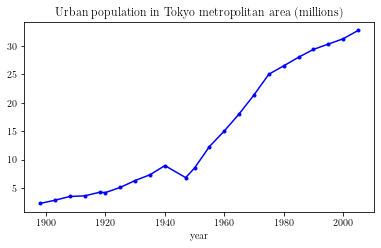

In [25]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_temp.plot(x = 'year_wst', y = 'pop_urban_mil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Urban population in Tokyo metropolitan area (millions)')
plt.savefig('../../Notes/Introduction/urban_pop_tokyo_metro_adj.pgf')
#plt.savefig('../../Graphs/pdf/urban_pop_tokyo_metro_adj.pdf')
plt.show()

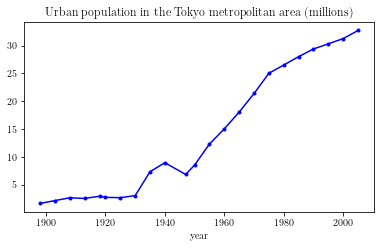

In [25]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df.plot(x = 'year_wst', y = 'pop_urban_mil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Urban population in the Tokyo metropolitan area (millions)')
plt.savefig('../../Notes/Facts/urban_pop_tokyo_metro.pgf')
plt.show()

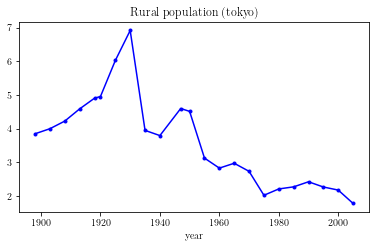

In [26]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df.plot(x = 'year_wst', y = 'pop_rural_mil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Rural population (tokyo)')
plt.savefig('../../Notes/Facts/rural_pop_tokyo_metro.pgf')
plt.show()

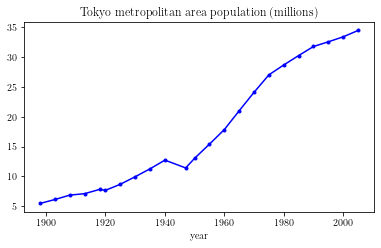

In [27]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df.plot(x = 'year_wst', y = 'pop_tot_mil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Tokyo metropolitan area population (millions)')
plt.savefig('../../Notes/Facts/tot_pop_tokyo_metro.pgf')
plt.show()

In [28]:
df_tokyo = df_tokyo.reset_index()

In [29]:
df_tokyo['pop_tot_mil'] = df_tokyo['pop_tot'] / cnvt_to_mil
df_tokyo['pop_urban_mil'] = df_tokyo['pop_urban'] /cnvt_to_mil
df_tokyo['pop_rural_mil'] = df_tokyo['pop_rural'] /cnvt_to_mil

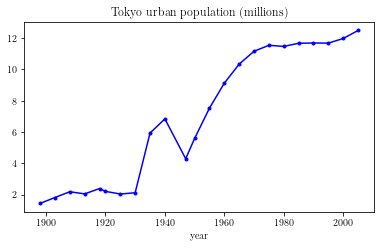

In [30]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_tokyo.plot(x = 'year_wst', y = 'pop_urban_mil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Tokyo urban population (millions)')
plt.savefig('../../Notes/Facts/urban_pop_tokyo_only.pgf')
plt.show()

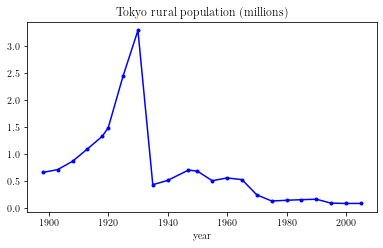

In [31]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_tokyo.plot(x = 'year_wst', y = 'pop_rural_mil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Tokyo rural population (millions)')
plt.savefig('../../Notes/Facts/rural_pop_tokyo_only.pgf')
plt.show()

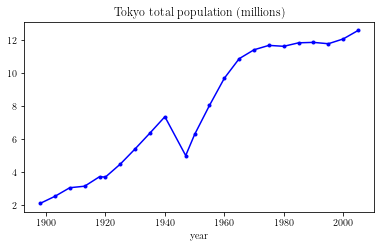

In [32]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_tokyo.plot(x = 'year_wst', y = 'pop_tot_mil', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Tokyo total population (millions)')
plt.savefig('../../Notes/Facts/tot_pop_tokyo_only.pgf')
plt.show()

In [33]:
df_merged = df_temp.join(df_tot[['pop_tot_mil', 'pop_urban_mil', 'pop_rural_mil']], lsuffix="_tokyo", rsuffix=("_tot"))

In [34]:
df_merged['tokyo_urb_share'] = df_merged['pop_urban_mil_tokyo'] / df_merged['pop_tot_mil_tot']

In [35]:
df_merged['tokyo_tot_share'] = df_merged['pop_tot_mil_tokyo'] / df_merged['pop_tot_mil_tot']

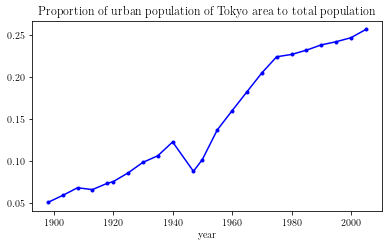

In [36]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_merged.plot(x = 'year_wst', y = 'tokyo_urb_share', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Proportion of urban population of Tokyo area to total population')
plt.savefig('../../Notes/Introduction/tokyo_urban_share.pgf')
plt.show()

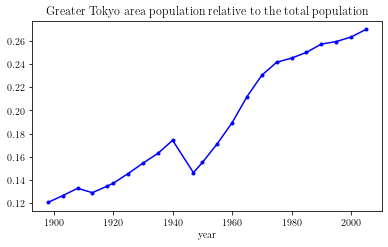

In [37]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_merged.plot(x = 'year_wst', y = 'tokyo_tot_share', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Greater Tokyo area population relative to the total population')
plt.savefig('../../Notes/Facts/tokyo_urban_share.pgf')
plt.show()

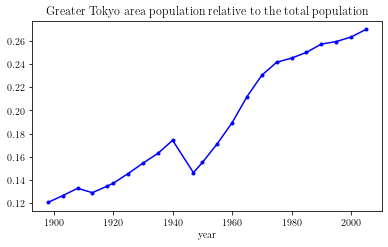

In [38]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#plt.rc('pgf', texsystem = 'xelatex')
df_merged.plot(x = 'year_wst', y = 'tokyo_tot_share', 
#               label = r'Normalized cap wedge $\biggl(\frac{1 + \tau_{R,t}}{1 + \tau_{C,t}}-1 \biggr)$', 
               marker = '.',
               #linestyle = '--',
               color = 'b',
               ax = ax)

#ax.set_rasterized(True)
ax.legend_.remove()
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title('Greater Tokyo area population relative to the total population')
plt.savefig('../../Notes/Facts/tokyo_urban_share.pgf')
plt.show()

In [39]:
df

,year_jpn,year_wst,pop_tot,pop_urban,pop_rural,area,pop_density,pop_urban_dense,area_urban_dense,pop_rural_dense,area_rural_dense,urban_share,rural_share,pop_tot_mil,pop_urban_mil,pop_rural_mil
0,明治31年,1898.0,5479741,1633883,3845858,............,............,0,0.0,0,0.0,0.298168,0.701832,5.479741,1.633883,3.845858
1,36,1903.0,6140937,2144690,3996247,............,............,0,0.0,0,0.0,0.349245,0.650755,6.140937,2.144690,3.996247
2,41,1908.0,6874447,2651346,4223101,............,............,0,0.0,0,0.0,0.385681,0.614319,6.874447,2.651346,4.223101
3,大正 2年,1913.0,7118880,2533173,4585707,............,............,0,0.0,0,0.0,0.355839,0.644161,7.118880,2.533173,4.585707
4,7,1918.0,7829819,2926268,4903551,............,............,0,0.0,0,0.0,0.373734,0.626266,7.829819,2.926268,4.903551
5,9,1920.0,7678506,2724973,4953533,2142.42351.633803.545078.81,1727563347263,0,0.0,0,0.0,0.354883,0.645117,7.678506,2.724973,4.953533
6,14,1925.0,8695654,2671439,6024215,2142.42351.633803.545078.81,2094602367276,0,0.0,0,0.0,0.307215,0.692785,8.695654,2.671439,6.024215
7,昭和 5年,1930.0,9957577,3041052,6916525,2144.792353.483801.445078.81,2522688384289,0,0.0,0,0.0,0.305401,0.694599,9.957577,3.041052,6.916525
8,10,1935.0,11285172,7338812,3946360,2144.82352.813802.685062.09,2970782402305,0,0.0,0,0.0,0.650306,0.349694,11.285172,7.338812,3.946360
9,15,1940.0,12740409,8948799,3791610,2144.82352.813802.685062.09,3429930423314,0,0.0,0,0.0,0.702395,0.297605,12.740409,8.948799,3.791610


In [40]:
df_temp[[ 'year_wst', 'pop_urban_mil']]

,year_wst,pop_urban_mil
0,1898.0,2.295546
1,1903.0,2.858712
2,1908.0,3.518669
3,1913.0,3.628412
4,1918.0,4.255500
5,1920.0,4.212245
6,1925.0,5.115728
7,1930.0,6.326929
8,1935.0,7.338812
9,1940.0,8.948799


In [41]:
df_merged[['year_wst', 'tokyo_urb_share']]

,year_wst,tokyo_urb_share
0,1898.0,0.050559
1,1903.0,0.058891
2,1908.0,0.068004
3,1913.0,0.065814
4,1918.0,0.073260
5,1920.0,0.075268
6,1925.0,0.085638
7,1930.0,0.098168
8,1935.0,0.105969
9,1940.0,0.122395


In [42]:
33418366 / 126925843

0.2632904789925248

In [43]:
df_merged[['year_wst', 'tokyo_urb_share']]

,year_wst,tokyo_urb_share
0,1898.0,0.050559
1,1903.0,0.058891
2,1908.0,0.068004
3,1913.0,0.065814
4,1918.0,0.073260
5,1920.0,0.075268
6,1925.0,0.085638
7,1930.0,0.098168
8,1935.0,0.105969
9,1940.0,0.122395


In [44]:
df_merged

,year_jpn,year_wst,pop_tot,pop_urban,pop_rural,area,pop_density,pop_urban_dense,area_urban_dense,pop_rural_dense,...,urban_share,rural_share,pop_tot_mil_tokyo,pop_urban_mil_tokyo,pop_rural_mil_tokyo,pop_tot_mil_tot,pop_urban_mil_tot,pop_rural_mil_tot,tokyo_urb_share,tokyo_tot_share
0,明治31年,1898.0,5479741,1633883,3845858,............,............,0,0.0,0,...,0.298168,0.701832,5.479741,2.295546,3.845858,45.403041,5.334563,40.068478,0.050559,0.120691
1,36,1903.0,6140937,2144690,3996247,............,............,0,0.0,0,...,0.349245,0.650755,6.140937,2.858712,3.996247,48.542736,6.809976,41.732760,0.058891,0.126506
2,41,1908.0,6874447,2651346,4223101,............,............,0,0.0,0,...,0.385681,0.614319,6.874447,3.518669,4.223101,51.741853,8.299744,43.442109,0.068004,0.132860
3,大正 2年,1913.0,7118880,2533173,4585707,............,............,0,0.0,0,...,0.355839,0.644161,7.118880,3.628412,4.585707,55.131270,8.999264,46.132006,0.065814,0.129126
4,7,1918.0,7829819,2926268,4903551,............,............,0,0.0,0,...,0.373734,0.626266,7.829819,4.255500,4.903551,58.087277,10.842857,47.244420,0.073260,0.134794
5,9,1920.0,7678506,2724973,4953533,2142.42351.633803.545078.81,1727563347263,0,0.0,0,...,0.354883,0.645117,7.678506,4.212245,4.953533,55.963053,10.096758,45.866295,0.075268,0.137207
6,14,1925.0,8695654,2671439,6024215,2142.42351.633803.545078.81,2094602367276,0,0.0,0,...,0.307215,0.692785,8.695654,5.115728,6.024215,59.736822,12.896850,46.839972,0.085638,0.145566
7,昭和 5年,1930.0,9957577,3041052,6916525,2144.792353.483801.445078.81,2522688384289,0,0.0,0,...,0.305401,0.694599,9.957577,6.326929,6.916525,64.450005,15.444300,49.005705,0.098168,0.154501
8,10,1935.0,11285172,7338812,3946360,2144.82352.813802.685062.09,2970782402305,0,0.0,0,...,0.650306,0.349694,11.285172,7.338812,3.946360,69.254148,22.666307,46.587841,0.105969,0.162953
9,15,1940.0,12740409,8948799,3791610,2144.82352.813802.685062.09,3429930423314,0,0.0,0,...,0.702395,0.297605,12.740409,8.948799,3.791610,73.114308,27.577539,45.536769,0.122395,0.174253
